<a href="https://colab.research.google.com/github/ericariyanto/mti/blob/main/PJJ_MTI_01_DS_UAS_Stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

## Dataset

In [4]:
pd.options.mode.copy_on_write = True

# file = "/content/drive/MyDrive/Labs/Dataset/pjjmti-ds-uas-stunting-2019-2022.csv"
# df = pd.read_csv(file)

# file = "/content/drive/MyDrive/Labs/Dataset/pjjmti-ds-uas-stunting-jabar.csv"
# df = pd.read_csv(file, sep= ";")

# file = "/content/drive/MyDrive/Labs/Dataset/pjjmti1-ds-uas-stunting-jabar-2013-2022.csv"
# df = pd.read_csv(file)

# file = "/content/drive/MyDrive/Labs/Dataset/pjjmti1-ds-uas-stunting-2103-2022.csv"
# df = pd.read_csv(file, sep= ";")

file = "/content/drive/MyDrive/Labs/Dataset/pjjmti1-ds-uas-stunting-2013-2022.csv"
df = pd.read_csv(file)


# df['order'] = df.reset_index().index + 1

#show data
df

,wilayah,tahun,target,x1,x2,x3,x4,x5,x6
0,1,2013,41.5,51.11,95.66,4.05,54.40,40.89,27.80
1,2,2013,42.5,54.34,97.43,2.49,60.99,31.20,39.52
2,3,2013,39.2,55.04,96.61,3.27,63.01,48.08,31.88
3,4,2013,36.8,58.62,97.04,2.65,65.17,44.21,37.43
4,5,2013,37.9,60.54,95.84,2.62,77.46,49.52,42.00
...,...,...,...,...,...,...,...,...,...
335,30,2022,35.0,98.09,1.57,2.90,53.67,71.39,78.98
336,31,2022,26.1,96.75,3.29,5.17,53.39,79.54,92.10
337,32,2022,26.1,97.78,3.21,4.23,51.22,73.38,88.10
338,33,2022,30.0,96.79,7.75,3.45,53.85,72.11,81.57


In [12]:
# ambil jawabarat saja

df = df.loc[df['wilayah'] == 12]
df.reset_index(drop=True, inplace=True)
df

,wilayah,tahun,target,x1,x2,x3,x4,x5,x6
0,12,2013,35.30,60.46,95.57,2.12,65.22,55.29,30.71
1,12,2014,30.45,60.44,95.34,2.38,68.61,51.46,29.40
2,12,2015,25.60,96.90,95.91,1.96,21.46,45.53,33.15
3,12,2016,25.10,97.11,96.53,2.29,58.05,43.12,32.32
4,12,2017,29.20,96.55,97.34,2.38,39.21,73.10,27.99
5,12,2018,31.10,97.14,97.38,2.29,39.21,73.10,71.06
6,12,2019,26.21,97.16,98.28,2.31,43.07,71.72,92.30
7,12,2020,25.55,97.43,98.41,2.31,46.93,74.20,93.42
8,12,2021,24.50,97.36,98.29,2.31,52.23,75.35,93.24
9,12,2022,20.20,97.95,4.61,2.38,55.17,76.17,93.04


In [13]:
year = df.loc[:, ['tahun']]
year

,tahun
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018
6,2019
7,2020
8,2021
9,2022


## Pre-Processing

### Finding Coefficient of Correlation

In [14]:
df.dtypes

wilayah      int64
tahun        int64
target     float64
x1         float64
x2         float64
x3         float64
x4         float64
x5         float64
x6         float64
dtype: object

In [16]:
# Looking for NaN values
print(df.isnull().any())

wilayah    False
tahun      False
target     False
x1         False
x2         False
x3         False
x4         False
x5         False
x6         False
dtype: bool


In [17]:
# remove Nan Values
df = df.dropna()
print(df.isnull().any())

wilayah    False
tahun      False
target     False
x1         False
x2         False
x3         False
x4         False
x5         False
x6         False
dtype: bool


In [18]:
# Identify the variables
## observe unique values

print("x1")
print(sorted(df.x1.unique()))
print("x2")
print(sorted(df.x2.unique()))
print("x3")
print(sorted(df.x3.unique()))
print("x4")
print(sorted(df.x4.unique()))
print("x5")
print(sorted(df.x5.unique()))
print("x6")
print(sorted(df.x6.unique()))
print("target")
print(sorted(df.target.unique()))

x1
[60.44, 60.46, 96.55, 96.9, 97.11, 97.14, 97.16, 97.36, 97.43, 97.95]
x2
[4.61, 95.34, 95.57, 95.91, 96.53, 97.34, 97.38, 98.28, 98.29, 98.41]
x3
[1.96, 2.12, 2.29, 2.31, 2.38]
x4
[21.46, 39.21, 43.07, 46.93, 52.23, 55.17, 58.05, 65.22, 68.61]
x5
[43.12, 45.53, 51.46, 55.29, 71.72, 73.1, 74.2, 75.35, 76.17]
x6
[27.99, 29.4, 30.71, 32.32, 33.15, 71.06, 92.3, 93.04, 93.24, 93.42]
target
[20.2, 24.5, 25.1, 25.55, 25.6, 26.21, 29.2, 30.45, 31.1, 35.3]


In [19]:
# if categorical found, convert it

df.dtypes

wilayah      int64
tahun        int64
target     float64
x1         float64
x2         float64
x3         float64
x4         float64
x5         float64
x6         float64
dtype: object

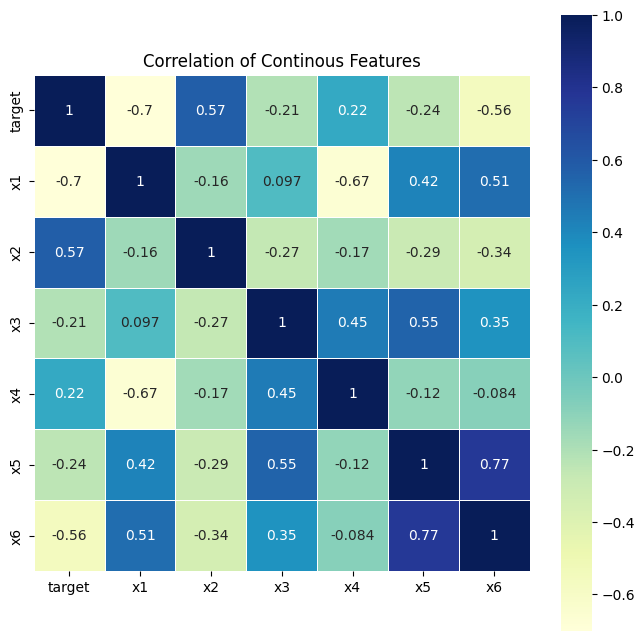

In [21]:
# correlation between variables
%matplotlib inline

CONTINOUS_VARIABLES = ['target','x1','x2','x3','x4','x5','x6']
# CONTINOUS_VARIABLES = ['target','x1','x2','x3','x4','x5','x6', 'tahun', 'wilayah']
# CONTINOUS_VARIABLES = ['target','x1','x2','x3','x4','x5','x6', 'tahun']
# CONTINOUS_VARIABLES = ['target','x1', 'tahun']

df_cont = df[CONTINOUS_VARIABLES]
cor_cont = df_cont.corr()

plt.subplots(figsize=(8,8))
plt.title('Correlation of Continous Features')
ax = sns.heatmap(cor_cont,
                 annot=True,
                 linewidths=.5,
                 cmap="YlGnBu",
                 square=True
                )

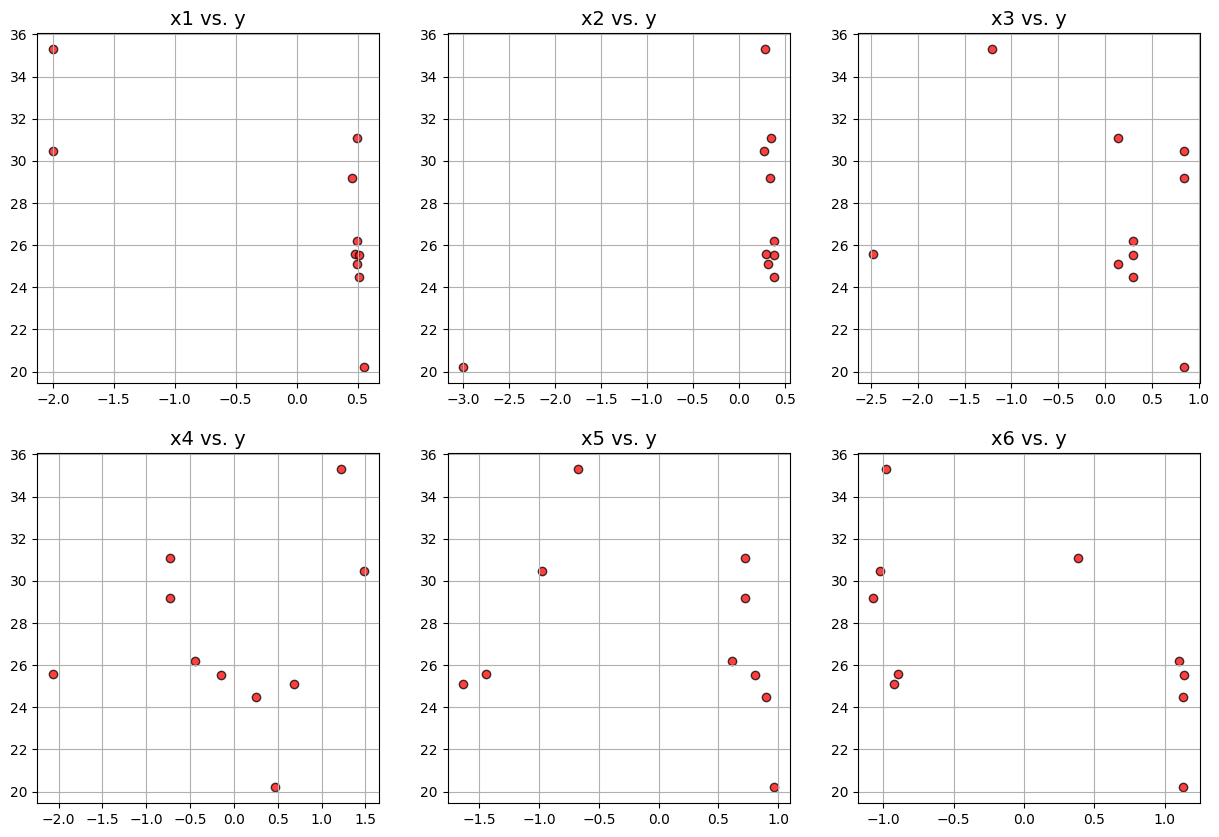

In [47]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
# fig,ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.ravel()
for i in range(6):
# for i in range(3):
    ax[i].scatter(df2[df2.columns[i]],df2['target'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df2.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

# Re-order column
df2 = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'target']]
# df2 = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'target', 'tahun']]
# df2 = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'target', 'tahun', 'wilayah']]
# df2 = df[['order', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'target']]
# df2 = df[['periode', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'target']]
# df2 = df[['periode', 'x1','x3', 'x4', 'target']]
# df2 = df[['x1', 'tahun', 'target']]


column_x = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
# column_x = ['x1', 'x3', 'x4']
# column_x = ['x2']
scaler = StandardScaler()

df2[column_x] = scaler.fit_transform(df2[column_x])

df2

,x1,x2,x3,x4,x5,x6,target
0,-1.998780,0.281328,-1.208024,1.226328,-0.677548,-0.976898,35.30
1,-2.000140,0.273037,0.844828,1.481311,-0.978803,-1.021099,30.45
2,0.479462,0.293585,-2.471318,-2.065141,-1.445236,-0.894571,25.60
3,0.493744,0.315935,0.134225,0.687026,-1.634799,-0.922575,25.10
4,0.455659,0.345135,0.844828,-0.730050,0.723326,-1.068673,29.20
5,0.495785,0.346577,0.134225,-0.730050,0.723326,0.384544,31.10
6,0.497145,0.379021,0.292137,-0.439715,0.614780,1.101199,26.21
7,0.515507,0.383708,0.292137,-0.149380,0.809848,1.138989,25.55
8,0.510746,0.379382,0.292137,0.249267,0.900303,1.132916,24.50
9,0.550872,-2.997707,0.844828,0.470403,0.964802,1.126168,20.20


### Visualisasi Dataset

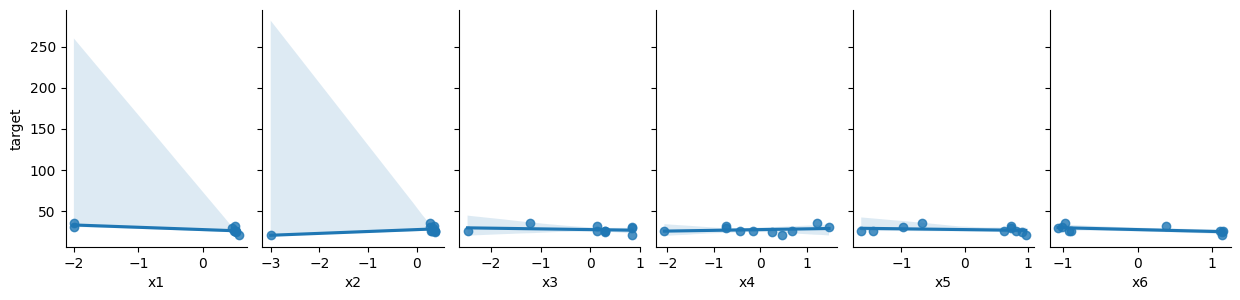

In [23]:
sns.pairplot(df2, x_vars=column_x, y_vars='target', height=3, aspect=0.7, kind='reg')

### Train and Test Split

In [25]:
# x = df2[column_x]
# column_x = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'tahun', 'wilayah']
# column_x = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'tahun']
column_x = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
# column_x = ['x5', 'tahun']
x = df2[column_x]
x.head()

,x1,x2,x3,x4,x5,x6
0,-1.998780,0.281328,-1.208024,1.226328,-0.677548,-0.976898
1,-2.000140,0.273037,0.844828,1.481311,-0.978803,-1.021099
2,0.479462,0.293585,-2.471318,-2.065141,-1.445236,-0.894571
3,0.493744,0.315935,0.134225,0.687026,-1.634799,-0.922575
4,0.455659,0.345135,0.844828,-0.730050,0.723326,-1.068673


In [26]:
y = df2['target']
y.head()

0    35.30
1    30.45
2    25.60
3    25.10
4    29.20
Name: target, dtype: float64

In [27]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train = x
x_test = x

y_train = y
y_test = y

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10, 6)
(10,)
(10, 6)
(10,)


## Modeling

In [44]:
algoritma = []
MAE = []
MSE = []
RMSE = []
R2 = []
MAPE = []

In [34]:
def set_dataframe_for(real, predict) :
  # df3 = pd.DataFrame({'Real Value':y_test, 'Predicted Value' : y_pred})
  df_test = pd.DataFrame({'Real Value':real, 'Predicted Value' : predict})

  df_test['order'] = df_test.reset_index().index + 1
  return df_test

In [35]:
def show_chart_diff(order, real, predict, title = 'Var : x1-x6 & Tahun') :

  # Plotting garis antara nilai aktual dan prediksi
  plt.figure(figsize=(10, 6))
  plt.plot(order, real, label='Real Value')
  plt.plot(order, predict, label='Predicted Value')

  # Label sumbu dan judul plot
  plt.xlabel('Data Point')
  plt.ylabel('Value')
  plt.title(title)

  # Menampilkan legenda
  plt.legend()

  # Menampilkan plot
  plt.show()

In [45]:
def calculate_evaluation(algoritma_name, actual, predict):
  global algoritma, MAE, MSE, RMSE, R2, MAPE

  model_MAE = mean_absolute_error(actual, predict)
  model_MSE = mean_squared_error(actual, predict)
  model_RMSE = mean_squared_error(actual, predict, squared=False)
  model_R2 = r2_score(actual, predict,)
  model_MAPE = mean_absolute_percentage_error(actual, predict)

  algoritma.append(algoritma_name)
  MAE.append(model_MAE)
  MSE.append(model_MSE)
  RMSE.append(model_RMSE)
  R2.append(model_R2)
  MAPE.append(model_MAPE)

  print('MAE: ', model_MAE)
  print('MSE: ', model_MSE)
  print('RMSE: ', model_RMSE)
  print('R2: ', model_R2)
  print('MAPE: ', model_MAPE)

### Linear Regression

In [29]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [30]:
# print the intercept and coefficients
print(linear.intercept_)
print(linear.coef_)

27.321
[-2.14663275  1.78690539 -1.25445574  0.50152724  2.99920433 -2.34385762]


In [31]:
# pair the feature names with the coefficients
list(zip(column_x, linear.coef_))

[('x1', -2.1466327458877474),
 ('x2', 1.7869053855868908),
 ('x3', -1.2544557418176654),
 ('x4', 0.5015272446200449),
 ('x5', 2.9992043268232127),
 ('x6', -2.3438576170429446)]

In [32]:
# make prediction
y_pred = linear.predict(x_test)

In [36]:
df3 = set_dataframe_for(y, y_pred)

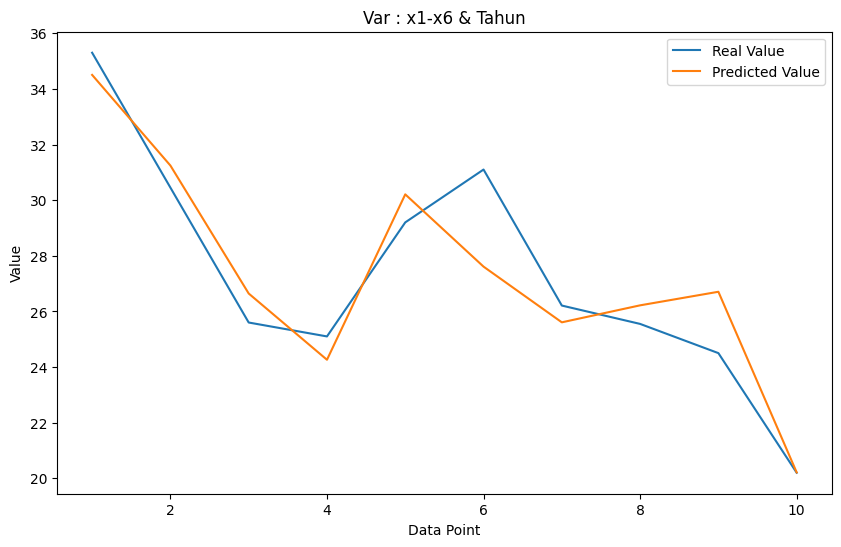

In [37]:
show_chart_diff(df3['order'], df3['Real Value'], df3['Predicted Value'])

In [46]:
n = len(df3.index)

calculate_evaluation('Linear Regression', y_test, y_pred)

MAE:  1.1459954549826232
MSE:  2.1931572192359483
RMSE:  1.4809312000346093
R2:  0.8647857624968519
MAPE:  0.04093416798972603


### Support vector regressor with linear kernel
Here is scikit-learn's SVR doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [48]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(x_train, y_train)

SVR(kernel='linear')

In [49]:
y_pred = svr_linear.predict(x_test)

calculate_evaluation('SVR Linear', y_test, y_pred)

MAE:  1.1479571641700765
MSE:  4.310700733589953
RMSE:  2.076222708090332
R2:  0.7342333200354483
MAPE:  0.03690385671635116


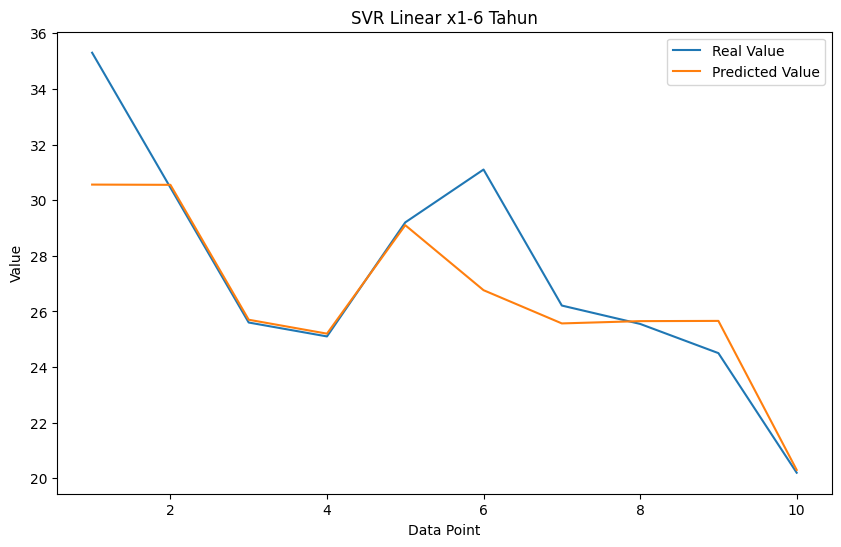

In [50]:
df3 = set_dataframe_for(y, y_pred)
show_chart_diff(df3['order'], df3['Real Value'], df3['Predicted Value'], "SVR Linear x1-6 Tahun")

### Linear regression as a baseline

In [51]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = linear.predict(x_test)

calculate_evaluation('Linear Regression as Baseline', y_test, y_pred)

MAE:  1.1459954549826232
MSE:  2.1931572192359483
RMSE:  1.4809312000346093
R2:  0.8647857624968519
MAPE:  0.04093416798972603


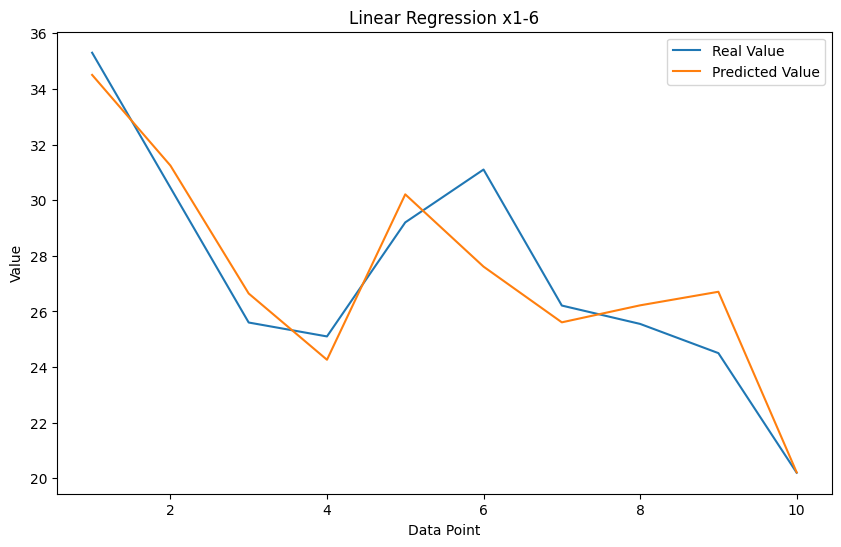

In [54]:
df3 = set_dataframe_for(y, y_pred)
show_chart_diff(df3['order'], df3['Real Value'], df3['Predicted Value'], 'Linear Regression x1-6')

### Support vector regressor with Gaussian (radial basis function) kernel

In [55]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(x_train, y_train)

SVR()

In [56]:
y_pred = svr_rbf.predict(x_test)

calculate_evaluation('SVR RBF', y_test, y_pred)

MAE:  2.4856380142378476
MSE:  12.020191256508562
RMSE:  3.467014747085533
R2:  0.2589218040843262
MAPE:  0.08844271722343353


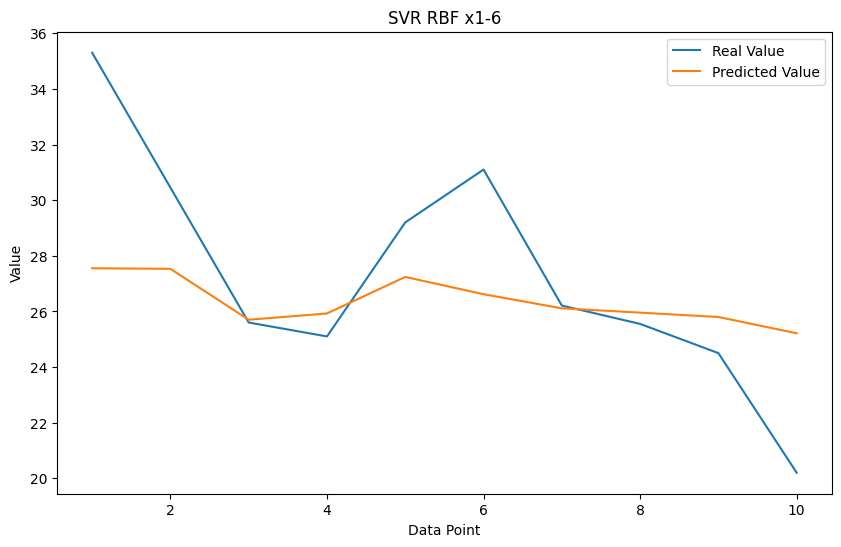

In [57]:
df3 = set_dataframe_for(y, y_pred)
show_chart_diff(df3['order'], df3['Real Value'], df3['Predicted Value'], 'SVR RBF x1-6')

#### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

In [58]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,0.8,1]}

grid = GridSearchCV(svr_linear,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
grid.best_estimator_

SVR(C=0.01, epsilon=1, kernel='linear')

#### Fit that estimator to the data and see

In [60]:
svr_best=SVR(kernel='linear', C=0.01, epsilon=1)
# svr_best=SVR(C=5.0, epsilon=0.5)
svr_best.fit(x_train, y_train)

SVR(C=0.01, epsilon=1, kernel='linear')

In [61]:
y_pred = svr_best.predict(x_test)

calculate_evaluation('Linear Regression Optimize', y_test, y_pred)

MAE:  3.147044348073085
MSE:  16.10421253871306
RMSE:  4.013005424705162
R2:  0.007130542255731953
MAPE:  0.11411484198394009


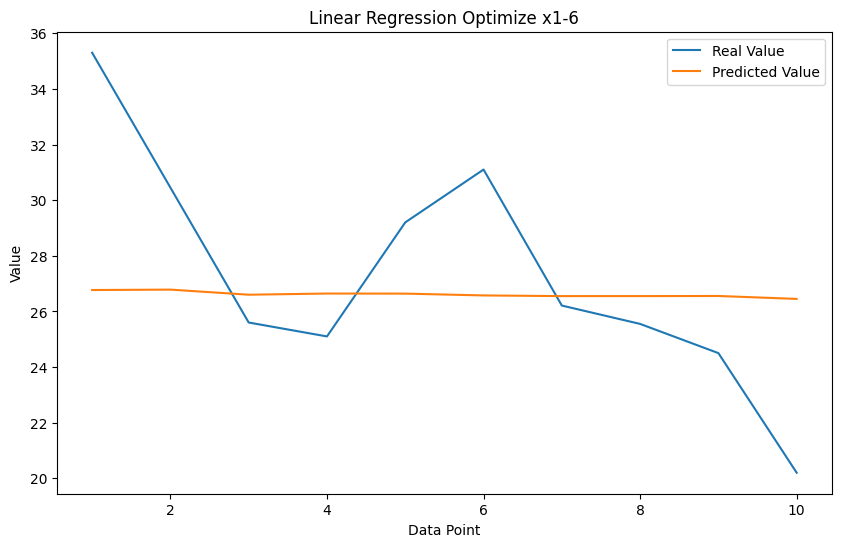

In [62]:
df3 = set_dataframe_for(y, y_pred)
show_chart_diff(df3['order'], df3['Real Value'], df3['Predicted Value'], 'Linear Regression Optimize x1-6')

### Ordinary Least Square (OLS) Regression

In [64]:
import statsmodels.api as sm

x = sm.add_constant(x)

ols = sm.OLS(y,x).fit()
ols.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     3.198
Date:                Sat, 16 Dec 2023   Prob (F-statistic):              0.184
Time:                        08:54:54   Log-Likelihood:                -18.116
No. Observations:                  10   AIC:                             50.23
Df Residuals:                       3   BIC:                             52.35
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3210      0.855     31.954      0.000      24.600      30.042
x1            -2.1466      1.891     -1.135      0.339      -8.163       3.870
x2             1.7869      0.956      1.868      0.159      -1.257       4.831
x3            -1.2545      1.716     -0.731      0.518      -6.716       4.207
x4             0.5015      2.120      0.237      0.828      -6.245       7.248
x5             2.9992      1.903      1.576      0.213      -3.056       9.055
x6            -2.3439      1.739     -1.348      0.271      -7.879       3.191
==============================================================================
Omnibus:                        4.801   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                1.617
Skew:                           0.928   Prob(JB):                        0.446
Kurtosis:                       3.658   Cond. No.                         6.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Seasonal ARIMA

https://github.com/mscharth/forecasting/blob/master/Tutorial14%20Seasonal%20ARIMA.ipynb

## Evaluation